In [5]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
print('Modules are imported.')

Modules are imported.


In [6]:
dir = "C:/Users/LalitSalunkhe/OneDrive - aioneers GmbH/Study/Projects/Covid 19 Data Analysis/Datasets"

In [7]:
covid_deaths_csv = pd.read_csv(dir+"/covid19_deaths_dataset.csv")
covid_deaths_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [9]:
covid_deaths_csv.shape

(266, 104)

## Delete the unnecessary columns

In [10]:
covid_deaths_csv.drop(columns = ["Lat", "Long"], axis = 1, inplace = True)

In [11]:
covid_deaths_csv.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


## Aggregating the rows by the country

In [12]:
covid_deaths_aggregated = covid_deaths_csv.groupby("Country/Region").sum()
covid_deaths_aggregated.head()

C:\Users\LalitSalunkhe\AppData\Local\Temp\ipykernel_9820\1094272063.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_deaths_aggregated = covid_deaths_csv.groupby("Country/Region").sum()


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [13]:
covid_deaths_aggregated.shape

(187, 100)

## Visualize country wide data

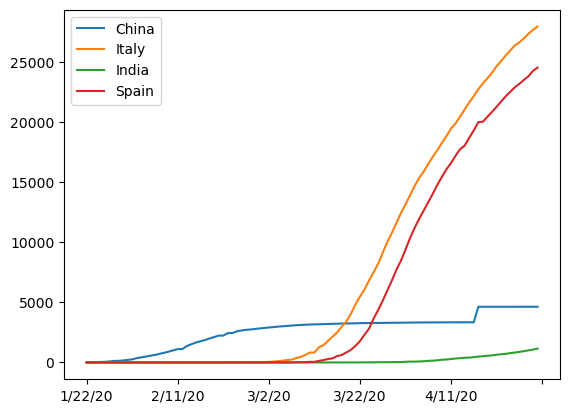

In [16]:
covid_deaths_aggregated.loc["China"].plot()
covid_deaths_aggregated.loc["Italy"].plot()
covid_deaths_aggregated.loc["India"].plot()
covid_deaths_aggregated.loc["Spain"].plot()
plt.legend()

<Axes: >

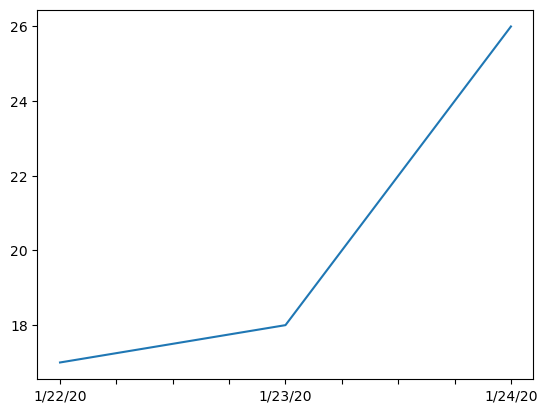

In [18]:
# Plot data for deaths in first three days in China
covid_deaths_aggregated.loc["China"][:3].plot()

# Take first derivative to find the max deaths

<Axes: >

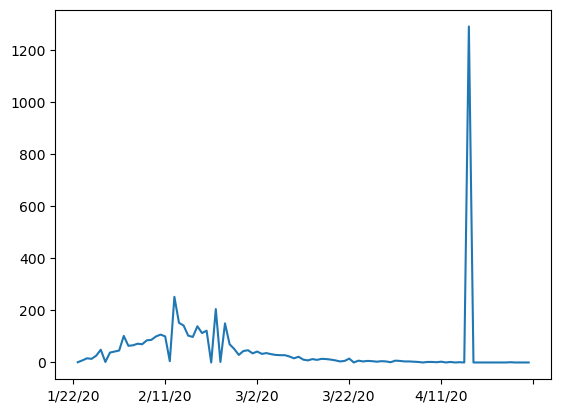

In [19]:
covid_deaths_aggregated.loc["China"].diff().plot()

In [20]:
covid_deaths_aggregated.loc["China"].diff().max()

1290.0

## Find out countrywide max death count and append it to dataframe

In [21]:
countries = list(covid_deaths_aggregated.index)

In [22]:
max_daeths = []
for c in countries:
    max_daeths.append(covid_deaths_aggregated.loc[c].diff().max())

In [23]:
max_daeths

[7.0,
 4.0,
 30.0,
 4.0,
 2.0,
 1.0,
 13.0,
 3.0,
 8.0,
 30.0,
 3.0,
 3.0,
 1.0,
 15.0,
 1.0,
 5.0,
 496.0,
 1.0,
 1.0,
 0.0,
 6.0,
 6.0,
 1.0,
 493.0,
 1.0,
 6.0,
 4.0,
 2.0,
 1.0,
 1.0,
 0.0,
 20.0,
 251.0,
 0.0,
 3.0,
 13.0,
 1290.0,
 26.0,
 0.0,
 3.0,
 5.0,
 1.0,
 4.0,
 8.0,
 6.0,
 2.0,
 18.0,
 22.0,
 2.0,
 1.0,
 0.0,
 38.0,
 208.0,
 22.0,
 1.0,
 1.0,
 0.0,
 6.0,
 1.0,
 2.0,
 0.0,
 43.0,
 1440.0,
 1.0,
 1.0,
 1.0,
 510.0,
 5.0,
 10.0,
 0.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 0.0,
 8.0,
 23.0,
 5.0,
 75.0,
 60.0,
 158.0,
 7.0,
 220.0,
 13.0,
 919.0,
 2.0,
 47.0,
 2.0,
 5.0,
 2.0,
 11.0,
 10.0,
 4.0,
 3.0,
 0.0,
 4.0,
 2.0,
 4.0,
 1.0,
 1.0,
 6.0,
 8.0,
 2.0,
 0.0,
 1.0,
 8.0,
 1.0,
 4.0,
 1.0,
 1.0,
 2.0,
 163.0,
 10.0,
 2.0,
 0.0,
 1.0,
 12.0,
 0.0,
 0.0,
 0.0,
 234.0,
 4.0,
 1.0,
 4.0,
 7.0,
 6.0,
 16.0,
 2.0,
 42.0,
 11.0,
 0.0,
 2.0,
 108.0,
 50.0,
 40.0,
 37.0,
 2.0,
 34.0,
 105.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 9.0,
 2.0,
 54.0,
 0.0,
 3.0,
 2.0,
 4.0,
 6.0,
 8.0,
 14.0,
 0.

In [24]:
# append this list as a new column to the dataframe
covid_deaths_aggregated["max_deaths"] = max_daeths
covid_deaths_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_deaths
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


## Create new dataframe with only required data

In [25]:
covid_deaths_df = pd.DataFrame(covid_deaths_aggregated["max_deaths"])
covid_deaths_df.head()

,max_deaths
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


## Import the WorldHappinessReport.csv and keep relevant columns

In [26]:
happiness_report_csv = pd.read_csv(dir+"/worldwide_happiness_report.csv")
happiness_report_csv.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## Remove unnecessary columns

In [27]:
cols_to_drop = ["Overall rank", "Score", "Generosity", "Perceptions of corruption"]

In [28]:
happiness_report_csv.drop(columns = cols_to_drop, axis = 1, inplace = True)
happiness_report_csv.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [29]:
# set the Country or region column as an index
happiness_report_csv.set_index("Country or region", inplace = True)

## Join two of these dataframes

In [31]:
corona_data = covid_deaths_df.join(
    happiness_report_csv,
    how = "inner"
)

corona_data.head()

,max_deaths,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283


## Correlation matrix

In [32]:
corona_data.corr()

,max_deaths,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_deaths,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


## Plotting GDP vs max_deaths

C:\anaconda\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


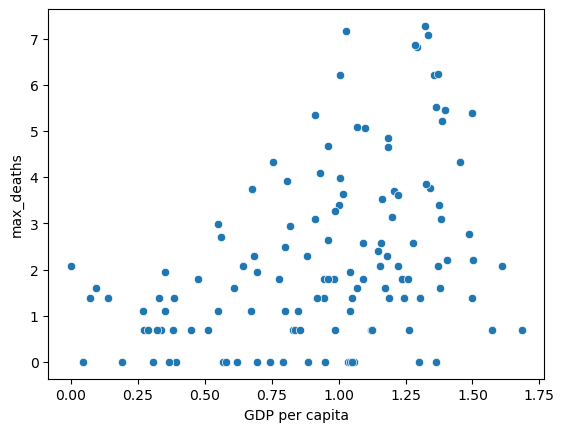

In [35]:
x = corona_data["GDP per capita"]
y = corona_data["max_deaths"]
sns.scatterplot(x=x, y=np.log(y));

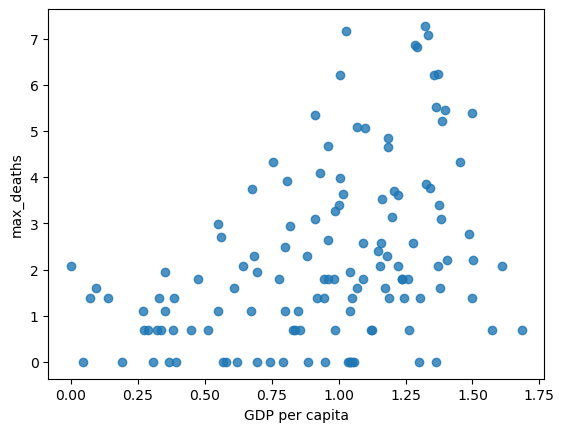

In [37]:
sns.regplot(x = x, y = np.log(y));

## Social support vs max_deaths

C:\anaconda\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


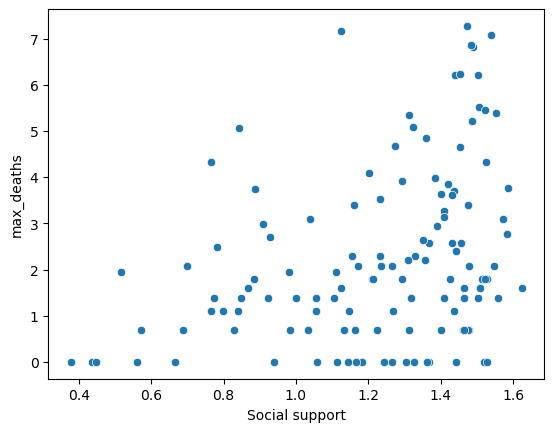

In [38]:
x = corona_data["Social support"]
y = corona_data["max_deaths"]
sns.scatterplot(x=x, y=np.log(y));

C:\anaconda\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\Lib\site-packages\numpy\lib\nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<Axes: xlabel='Social support', ylabel='max_deaths'>

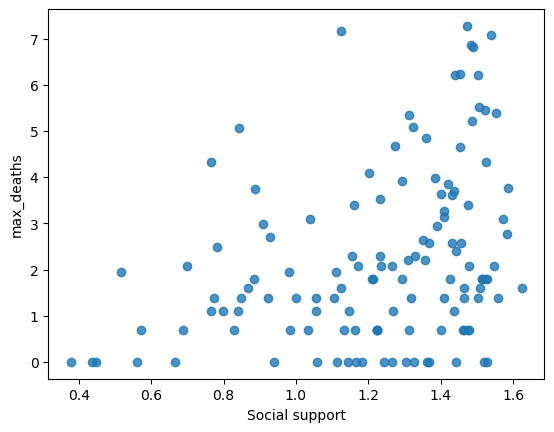

In [39]:
sns.regplot(x=x, y=np.log(y))